[seaborn](https://seaborn.pydata.org/) makes our life easy when it comes to slicing and plotting data in Python.  
That awesome buffet of well balanced aesthetic and practical functionalities of its ergonomic API comes with a few caveats to consider though.  
Here's one of them when trying to plot data including PyTorch tensors.

In [ ]:
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from torch import tensor
sns.set_context(context="talk")

Let's create 2 simple `numpy` arrays simulating the values of two variables, `x` and `y`.  

In [ ]:
x = np.arange(20) + np.random.normal(scale=1.7, size=20).round(2)
y = np.arange(20) + np.random.normal(scale=1.7, size=20).round(2)
x[:5], y[:5]

(array([-1.41,  3.97,  3.2 ,  4.63,  2.99]),
 array([-0.58,  1.07, -0.13,  0.79,  3.84]))

We can plot them using seaborn scatterplot:

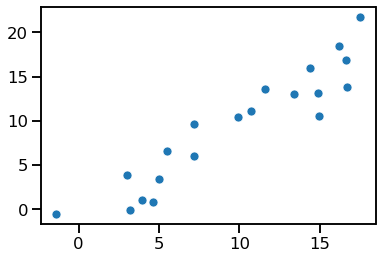

In [ ]:
sns.scatterplot(x=x, y=y);

We can achieve the same using lists:

In [ ]:
x_li = x.tolist()
y_li = y.tolist()
x_li[:5], y_li[:5]

([3.93, 1.6400000000000001, 2.91, 2.75, 0.3900000000000001],
 [-1.08, 0.91, 4.970000000000001, 3.64, 8.129999999999999])

Again, we can plot them using `seaborn` scatterplot:

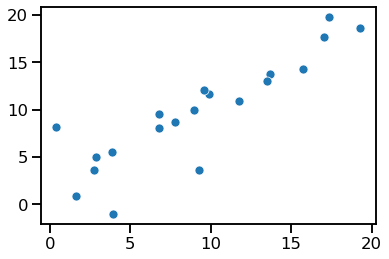

In [ ]:
sns.scatterplot(x=x_li, y=y_li);

Observe that the lists are made up of python `float`s while the `numpy` arrays contain `numpy.float64`:

In [ ]:
type(x[0]), type(x_li[0])

(numpy.float64, float)

So far so good.

Now what happens if the individual elements are pytorch zero-dimensional tensors (i.e. scalars) like these:

In [ ]:
x_pt = [tensor(o) for o in x] 
y_pt = [tensor(o) for o in y] 

x_pt[:5], y_pt[:5]

([tensor(3.9300, dtype=torch.float64),
  tensor(1.6400, dtype=torch.float64),
  tensor(2.9100, dtype=torch.float64),
  tensor(2.7500, dtype=torch.float64),
  tensor(0.3900, dtype=torch.float64)],
 [tensor(-1.0800, dtype=torch.float64),
  tensor(0.9100, dtype=torch.float64),
  tensor(4.9700, dtype=torch.float64),
  tensor(3.6400, dtype=torch.float64),
  tensor(8.1300, dtype=torch.float64)])

At first glance it looks like it should be all kind of the same.
Indeed some comparisons still work the way we (I?) expect.
For example, the element-wise equality:

In [ ]:
x == x_li

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
x == x_pt

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
(x == x_pt).all()

True

In [ ]:
x_pt == x

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

This happens thanks to the fact that numpy under the hood first casts the objects and then compares them.  
When comparing the python list directly to the tensor we have this:

In [ ]:
x_li == x_pt

True

That is not quite what I expect (i.e. element-wise comparison), but it is still aligned with our believe that these array-like structures (list, array, tensor) are made of equivalent scalar elements.

So let's plot the tensors, like we did with the lists and the arrays:

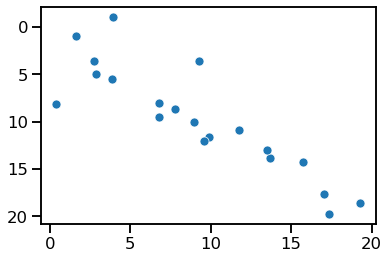

In [ ]:
sns.scatterplot(x=x_pt, y=y_pt);

Ups, that doesn't look good – the y-axis is flipped!

After going a bit down the rabbit hole of `seaborn` and `pandas` error traces, we see that under the hood `seaborn` infers the data type of the values and –surprise!– pytorch tensors seem to be interpreted as categorical.  
That can be more explicitely seen if we try to plot the data with the `pointplot` function instead:

In [ ]:
sns.pointplot(x=x_pt, y=y_pt);

TypeError: Neither the `x` nor `y` variable appears to be numeric.

To go a bit deeper understanding this behaviour you can read the section *"Categorical plots will always be categorical"* of [this article](https://michaelwaskom.medium.com/three-common-seaborn-difficulties-10fdd0cc2a8b) by seaborn's creator Michaels Waskom himself.

## Let's fix it
A couple of options to fix our plots.  
We can flip the y-axis:

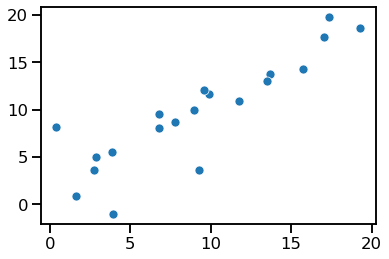

In [ ]:
ax = sns.scatterplot(x=x_pt, y=y_pt)
ax.invert_yaxis()

We can cast the data, for example to a numpy array:

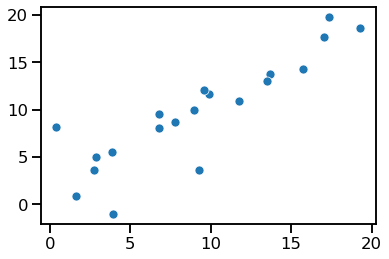

In [ ]:
sns.scatterplot(x=np.array(x_pt), y=np.array(y_pt));

Or to a tensor:

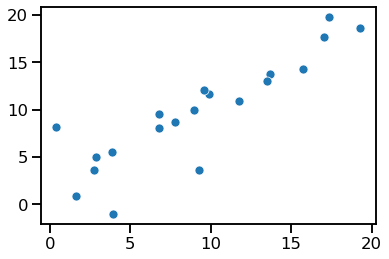

In [ ]:
sns.scatterplot(x=tensor(x_pt), y=tensor(y_pt));

#### Note:

In [ ]:
# This is the state as of today with 
sns.__version__

'0.11.2'

Maybe that changes in in the future.

PS: Consider starring the seaborn project on [github](https://github.com/mwaskom/seaborn).

<div style="text-align: right; font-size: 40px; font-family: 'Inconsolata', monospace;">
  /Fin
</div>
    
<div style="font-family: 'Inconsolata', monospace;">
Any bugs, questions, comments, suggestions? Ping me on [twitter](https://www.twitter.com/fabridamicelli) or drop me an e-mail (fabridamicelli at gmail).  
Share this article on your favourite platform:
</div>